1. Import and analyse the data set.

In [1]:
from keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, TimeDistributed, Flatten, Dense

In [2]:
from keras_preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 20  #number of word used from each review

Train test split


In [3]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [4]:
print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train), len(x_test)))


Loaded dataset with 25000 training samples, 25000 test samples


In [5]:
print('---review---')
print(x_train[6])
print('---label---')
print(y_train[6])
    

---review---
[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 2, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [6]:
data = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((y_train, y_train), axis=0)

2. Perform relevant sequence adding on the data

In order to feed this data into our RNN, all input documents must have the same length. We will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the pad_sequences() function in Keras. For now, set max_words to 20.



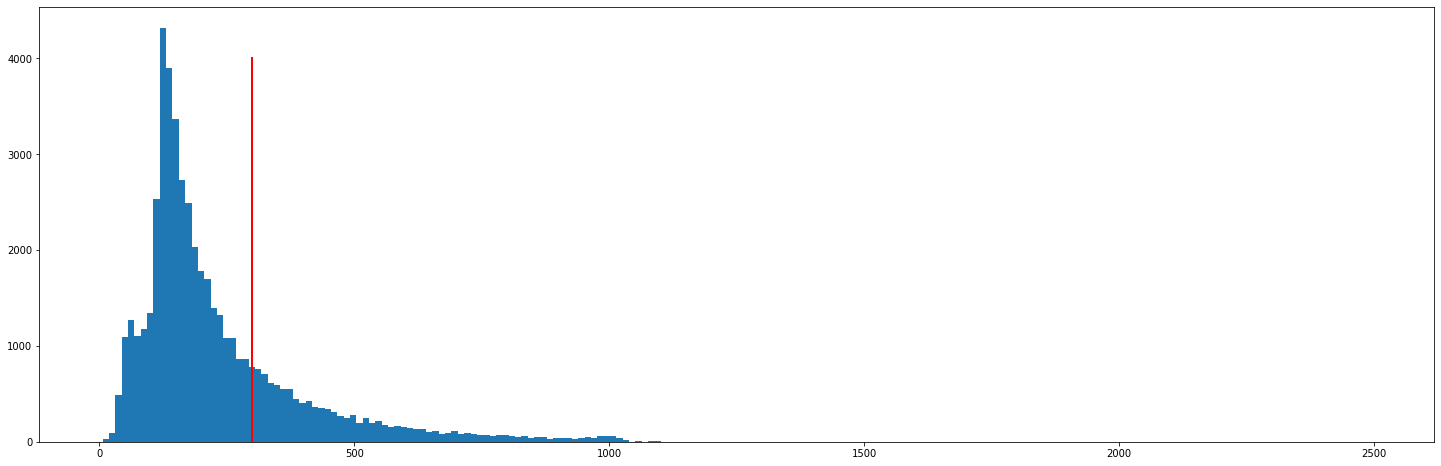

Average review length: 234.75892
Standard deviation: 173
No of reviews with length below 20: 28


In [7]:
length = [len(i) for i in data]
plt.figure(figsize=(25,8))
plt.hist(length, bins= 200)
plt.plot([300, 300], [0, 4000], 'r', linewidth=2.0)
plt.show()
print("Average review length: {}".format(np.mean(length)))
print("Standard deviation: {}".format(round(np.std(length))))
print("No of reviews with length below 20: {}".format(sum(i < 21 for i in length)))

In [8]:
data_padded = pad_sequences(data, padding='post', maxlen=maxlen)


3. Perform following data analysis:

Print shape of features and labels

In [9]:
print('Number of reviews: {}, Number of words in each review: {}'.format(data_padded.shape[0],data_padded.shape[1]))


Number of reviews: 50000, Number of words in each review: 20


In [10]:
print('Number of labels: {}'.format(labels.shape[0]))


Number of labels: 50000


Print value of any one feature and it's label

In [11]:
data_padded[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [12]:
labels[0]

1

4. Decode the feature value to get original sentence 

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset



In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [14]:
print(" ".join([reverse_word_index.get(n-3, '#') for n in data_padded[1]]))


on the disaster that was the 80's and have a good old laugh at how bad everything was back then


Get the sentiment for the above sentence

positive (1)
negative (0)

In [15]:
labels[1]

0

5. Design, train, tune and test a sequential model. 

In [16]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data_padded, labels, test_size=0.20, random_state=0)

Define model


In [17]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=20))
model.add(LSTM(units=100, return_sequences=True, dropout=0.2))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

Compile the model


In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


Print model summary


In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 20, 100)           80400     
                                                                 
 time_distributed (TimeDistr  (None, 20, 100)          10100     
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 1,092,501
Trainable params: 1,092,501
Non-trainable params: 0
______________________________________________

Fit the model

In [20]:
history = model.fit(train_X, np.array(train_y), batch_size=100, epochs=50, validation_split=0.1, verbose=1)


Epoch 1/50
360/360 [==============================] - 5s 6ms/step - loss: 0.6695 - accuracy: 0.5840 - val_loss: 0.6640 - val_accuracy: 0.6010
Epoch 2/50
360/360 [==============================] - 2s 5ms/step - loss: 0.6148 - accuracy: 0.6679 - val_loss: 0.6828 - val_accuracy: 0.5968
Epoch 3/50
360/360 [==============================] - 2s 5ms/step - loss: 0.5284 - accuracy: 0.7372 - val_loss: 0.7480 - val_accuracy: 0.5750
Epoch 4/50
360/360 [==============================] - 2s 5ms/step - loss: 0.4241 - accuracy: 0.8023 - val_loss: 0.8839 - val_accuracy: 0.5660
Epoch 5/50
360/360 [==============================] - 2s 5ms/step - loss: 0.3318 - accuracy: 0.8559 - val_loss: 1.0326 - val_accuracy: 0.5757
Epoch 6/50
360/360 [==============================] - 2s 5ms/step - loss: 0.2568 - accuracy: 0.8936 - val_loss: 1.2110 - val_accuracy: 0.5580
Epoch 7/50
360/360 [==============================] - 2s 5ms/step - loss: 0.2002 - accuracy: 0.9174 - val_loss: 1.5142 - val_accuracy: 0.5577
Epoch 

Evaluate model


In [21]:
results = model.evaluate(test_X, test_y)


313/313 [==============================] - 1s 3ms/step - loss: 5.3287 - accuracy: 0.5427


In [22]:
from sklearn.metrics import confusion_matrix
predict_y = (model.predict(test_X) > 0.5).astype("int32").flatten()
confusion_matrix(test_y, predict_y)

313/313 [==============================] - 1s 2ms/step


array([[2737, 2260],
       [2313, 2690]])

In [23]:
from sklearn.metrics import classification_report

print(classification_report(test_y, predict_y))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54      4997
           1       0.54      0.54      0.54      5003

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



6. Use the designed model to print the prediction on any one sample

In [24]:
print('Prediction: {} | Ground Truth: {}'.format(((model.predict(test_X[0].reshape(-1,20)) > 0.5).astype("int32").flatten()), test_y[0]))


1/1 [==============================] - 0s 16ms/step
Prediction: [1] | Ground Truth: 1
